In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import numpy as np

import os

## Dataset

In [13]:
%run load_dataset.ipynb

In [14]:
subj_range = np.hstack((np.arange(1001,1013),np.arange(2002,2003)))

all_subjects = [str(i) for i in subj_range]

In [15]:
X_all, y_all, subj_all = load_all_data(all_subjects)

Loading 1001's data


C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 2002's data
Finished loading


## Data preprocessing

In [16]:
%run preprocessing.ipynb

In [ ]:
roll, pitch, yaw = calc_rpy(X_all, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape, y_all.shape)

In [ ]:
X_pca, pca = apply_pca(X_all, y_all,label_list)
rpy_pca, pca = apply_pca(rpy, y_all, label_list)

In [17]:
subj_train = ['1001','1002','1003','1004','2001']
subj_val = ['1005','1006','2002']
subj_test = ['1007','1008','1009']

In [18]:
def get_X_y(subj_ids, X, y, s):
    X_get = []
    y_get = []
    s_get = []
    for i in range(len(s)):
        for j in range(len(subj_ids)):
            if(s[i]==subj_ids[j]):
                X_get.append(X[i])
                y_get.append(y[i])
                s_get.append(s[i])
                
    return np.array(X_get), np.array(y_get), np.array(s_get)

In [19]:
X_train2, y_train2, s_train = get_X_y(subj_train, X_all, y_all, subj_all)
X_val, y_val, s_val = get_X_y(subj_val, X_all, y_all, subj_all)
X_test2, y_test2, s_test = get_X_y(subj_test, X_all, y_all, subj_all)

In [20]:
def prepare_pure(X, y, subj_all, new_label_list):
    X_label, y_label = label_grouping(X, y, subj_all, new_label_list)
    
    X_concat = []
    y_concat = []
    for i in range(len(X_label)):
        for j in range(len(X_label[i])):
            X_ol, y_ol = make_overlapping(np.array(X_label[i][j]), y_label[i][j])
#             print(i, j, X_ol.shape)
            
            if(len(X_concat)==0):
                X_concat = X_ol
            else:
                X_concat = np.vstack((X_concat, X_ol))

            if(len(y_concat)==0):
                y_concat = y_ol
            else:
                y_concat = np.hstack((y_concat, y_ol))
                
#     X_concat_xyz = concat_xyz(X_concat)
    
    return X_concat, y_concat    

In [21]:
X_label, y_label = label_grouping(X_train2, y_train2, s_train, label_list)

TypeError: label_grouping() missing 1 required positional argument: 'lb_list'

In [22]:
print(X_train2.shape,y_train2.shape,s_train.shape)

(8060, 3) (8060,) (8060,)


In [ ]:
label_list = [0,1,2,3]
label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

all_subjects = subj_train
X_train_pure, y_train_pure = prepare_pure(X_train2, y_train2, s_train, label_list)

all_subjects = subj_val
X_val_pure, y_val_pure = prepare_pure(X_val, y_val, s_val, label_list)


all_subjects = subj_test
X_test_pure, y_test_pure = prepare_pure(X_test2, y_test2, s_test, label_list)

In [ ]:
VAL_LEN = X_val_pure.shape[0]
X_train_pure = X_train_pure[:VAL_LEN]
y_train_pure = y_train_pure[:VAL_LEN]

print(VAL_LEN)
print(y_train_pure.shape[0])

In [ ]:
LABEL_COUNT = 4

In [ ]:
def reshape_y(y):
    
    y_rs_ = label_binarize(y, classes=[0,1,2,3])
    
    y_rs = []
    #for i in range(len(y_rs_)):
     #   y_temp = []
      #  for j in range(window_length):
       #     y_temp.append(y_rs_[i])
            
       # y_rs.append(np.array(y_temp))
        
    y_rs = np.array(y_rs_)
    y_rs = y_rs.reshape((y_rs.shape[0],LABEL_COUNT))
        
    return np.array(y_rs)

In [ ]:
def reshape_X(X):
    X_rs = X.reshape((X.shape[0],1,X.shape[1]))
    return X_rs

In [ ]:
y_train_rs = reshape_y(y_train_pure)
y_val_rs = reshape_y(y_val_pure)
y_test_rs = reshape_y(y_test_pure)

In [ ]:
print(X_train_pure.shape)
print(X_train_pure.shape[1])
print(X_train_pure.shape[2])
print(y_train_rs.shape)
print(y_train_pure.shape)

## Load model

In [ ]:
% run RNN_model.ipynb

## Plot acc and loss

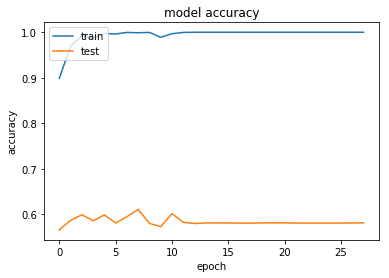

In [215]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

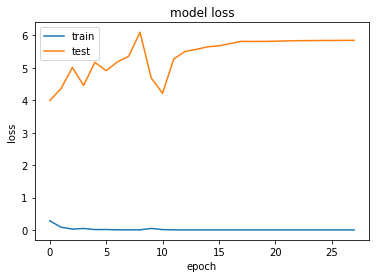

In [216]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Predict

In [217]:
num_classes = 4

In [218]:
y_pred2 = m.predict(X_test_pure)
print(y_pred2.shape)
print(y_test_rs.shape)

(5274, 4)
(5274, 4)


In [219]:
y_pred2 = np.argmax(y_pred2, axis=1)

In [220]:
print(y_pred2.shape)
print(y_test_rs.shape)

(5274,)
(5274, 4)


In [221]:
y_pred2 = np_utils.to_categorical(y_pred2, num_classes)

In [222]:
print(y_pred2.shape)
print(y_test_rs.shape)

(5274, 4)
(5274, 4)


In [223]:
y_pred2 = np.array(y_pred2)
y_test_rs = np.array(y_test_rs)

In [224]:
print(y_pred2)
print(y_test_rs)

[[ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 ..., 
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]]
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ..., 
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [225]:
LABELS = list(label_dict.values())

## Visualization

In [226]:
%run eval_score.ipynb

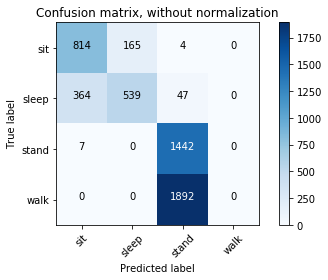

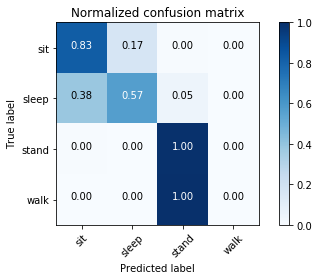

In [227]:
show_conf_matrix(y_test_rs.argmax(axis=1), y_pred2.argmax(axis=1), LABELS)

In [228]:
show_clf_report(y_test_rs, y_pred2, LABELS)

             precision    recall  f1-score   support

        sit       0.69      0.83      0.75       983
      sleep       0.77      0.57      0.65       950
      stand       0.43      1.00      0.60      1449
       walk       0.00      0.00      0.00      1892

avg / total       0.38      0.53      0.42      5274



C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
